In [1]:
# Taken from HW1, regular expressions adapted to use with Windows

import re
import matplotlib

matplotlib.use('Agg') # This is needed to save images 
import matplotlib.pyplot as plt
%matplotlib inline

delimiters = " ", ":", "\t"
regexPattern = '|'.join(map(re.escape, delimiters))

train_losses = []
val_losses = []
val_accs = []

model_name = "squeezenet"
filename = model_name + ".log"

with open(filename, 'r', newline='') as f:
    for line in f:
        ss = re.split(regexPattern, line)
        if len(ss) == 18:
            # ss[9] ss[13] ss[17]
            tr = float(ss[9].replace('\x00', ''))
            vl = float(ss[13].replace('\x00', ''))
            va = float(ss[17].replace('\x00', ''))
            #print(tr, vl, va)
            train_losses.append(tr)
            val_losses.append(vl)
            val_accs.append(va)

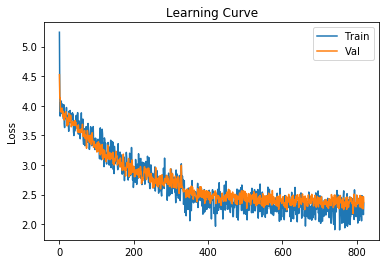

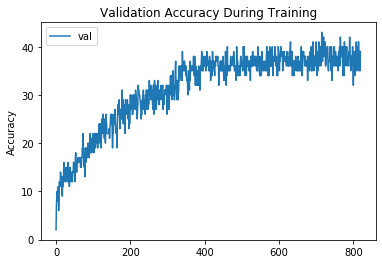

In [2]:
fig = plt.figure()
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Val")
plt.title("Learning Curve")
plt.ylabel("Loss")
plt.legend()
fig.savefig(model_name + "_lossvstrain.png")

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title("Validation Accuracy During Training")
plt.ylabel("Accuracy")
plt.legend()
fig.savefig(model_name + "_valaccuracy.png")